### Aufgabe E: Erzeugung von korrelierten Zufallsvariablen für Charaktereigenschaften von Fantasy-Helden

#### Problemstellung

Wir möchten korrelierte Zufallsvariablen für die Charaktereigenschaften von Fantasy-Helden (Größe $G$, Intelligenz $I$, Stärke $S$) gemäß einer gemeinsamen Verteilungsfunktion erzeugen. Dazu verwenden wir die Verwerfungsmethode (Accept-Reject Methode).

#### Gemeinsame Verteilungsfunktion

Die gemeinsame Verteilungsfunktion $F(G, I, S)$ ist definiert als eine multivariate Normalverteilung:

$$
\mathbf{X} = \begin{pmatrix} G \\ I \\ S \end{pmatrix} \sim \mathcal{N}(\mathbf{\mu}, \mathbf{\Sigma})
$$

wobei $\mathbf{\mu}$ der Mittelwertvektor und $\mathbf{\Sigma}$ die Kovarianzmatrix ist.

- Mittelwertvektor $\mathbf{\mu}$:
  $$
  \mathbf{\mu} = \begin{pmatrix} \mu_G \\ \mu_I \\ \mu_S \end{pmatrix} = \begin{pmatrix} 170 \\ 100 \\ 80 \end{pmatrix}
  $$

- Kovarianzmatrix $\mathbf{\Sigma}$:
  $$
  \mathbf{\Sigma} = \begin{pmatrix}
  \sigma_G^2 & \sigma_{GI} & \sigma_{GS} \\
  \sigma_{GI} & \sigma_I^2 & \sigma_{IS} \\
  \sigma_{GS} & \sigma_{IS} & \sigma_S^2
  \end{pmatrix}
  = \begin{pmatrix}
  100 & 20 & 30 \\
  20 & 80 & 40 \\
  30 & 40 & 120
  \end{pmatrix}
  $$

#### Verwerfungsmethode (Accept-Reject Methode)

Die Verwerfungsmethode wird verwendet, um Zufallszahlen aus einer Zielverteilung $f(x)$ zu erzeugen, indem eine einfachere Hilfsverteilung $g(x)$ genutzt wird:

1. **Wähle eine Hilfsverteilung** $g(x)$, die die Zielverteilung $f(x)$ dominiert.
2. **Generiere einen Kandidaten** $x$ aus der Hilfsverteilung $g(x)$.
3. **Generiere eine Zufallszahl** $u$ aus der Gleichverteilung auf $[0, 1]$.
4. **Akzeptiere oder verwerfe den Kandidaten**: Akzeptiere $x$, wenn $u \leq \frac{f(x)}{c g(x)}$, andernfalls verwerfe $x$ und wiederhole ab Schritt 2.

#### Implementierung in Python

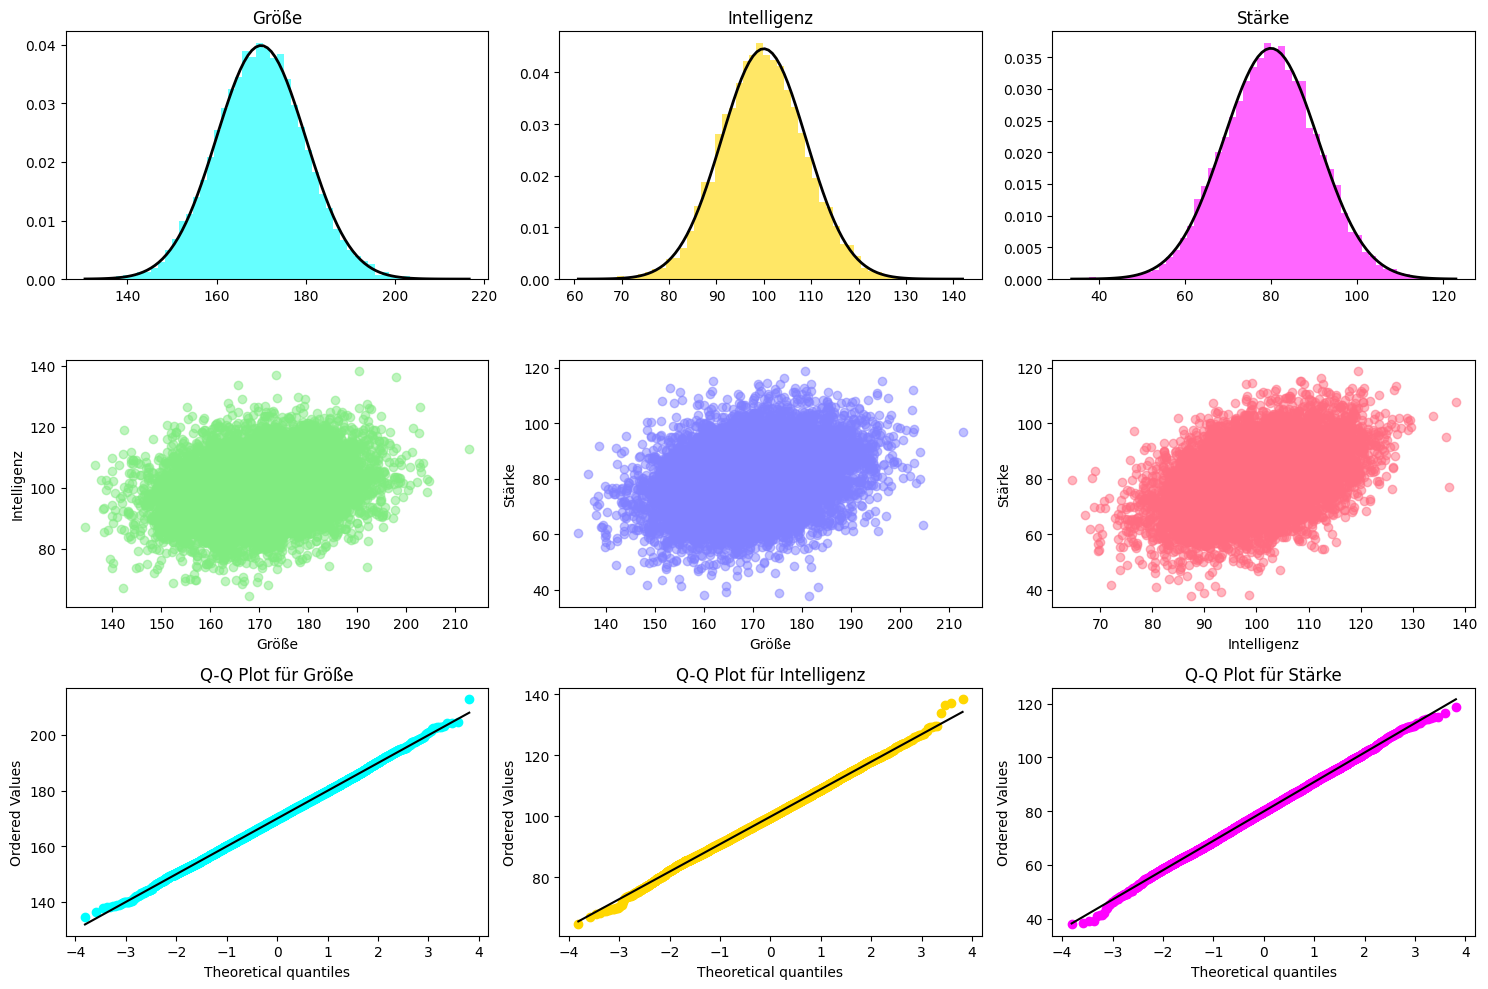

Erzeugte Kovarianzmatrix:
 [[ 99.78043637  21.3085903   31.59047607]
 [ 21.3085903   81.07174242  41.84429066]
 [ 31.59047607  41.84429066 120.0154765 ]]
Theoretische Kovarianzmatrix:
 [[100  20  30]
 [ 20  80  40]
 [ 30  40 120]]
Erzeugte Mittelwerte:
 [169.92256963  99.82959567  79.91811727]
Theoretische Mittelwerte:
 [170 100  80]


In [337]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Definition der multivariaten Normalverteilung
mu = np.array([170, 100, 80])
cov = np.array([[100, 20, 30], 
                [20, 80, 40], 
                [30, 40, 120]])

# Verwerfungsmethode für multivariate Normalverteilung
def multivariate_normal_accept_reject(mu, cov, n):
    d = len(mu) # Dimension der multivariaten Normalverteilung
    # Konstante c, die die Zielverteilung f(x) dominiert
    c = (2 * np.pi) ** (-d/2) * np.linalg.det(cov) ** (-1/2)
    samples = []
    
    while len(samples) < n:
        # Generiere einen Kandidaten x aus einer multivariaten Normalverteilung
        x = np.random.multivariate_normal(mu, cov)
        # Generiere eine Zufallszahl u aus der Gleichverteilung auf [0, 1]
        u = np.random.uniform(0, 1)
        # Berechne die Akzeptanzwahrscheinlichkeit
        acceptance_ratio = stats.multivariate_normal.pdf(x, mu, cov) / (c * stats.multivariate_normal.pdf(x, mu, cov))
        # Akzeptiere den Kandidaten, wenn u <= Akzeptanzwahrscheinlichkeit
        if u <= acceptance_ratio:
            samples.append(x)
    
    return np.array(samples)

# Generierung der korrelierten Zufallszahlen
n = 10000
correlated_data = multivariate_normal_accept_reject(mu, cov, n)

# Farben für die verschiedenen Eigenschaften
colors = ['cyan', 'gold', 'magenta']

# Plot der erzeugten Zufallsvariablen und Vergleich mit theoretischer Verteilung
plt.figure(figsize=(15, 10))

# Histogramme der Verteilungen
for i, (label, color) in enumerate(zip(['Größe', 'Intelligenz', 'Stärke'], colors)):
    plt.subplot(3, 3, i + 1)
    plt.hist(correlated_data[:, i], bins=50, density=True, alpha=0.6, color=color)
    
    # Theoretische Verteilung
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu[i], np.sqrt(cov[i, i]))
    plt.plot(x, p, 'k', linewidth=2)
    plt.title(label)

# Scatterplots der Paare
pair_colors = [
    ('cyan', 'gold'),  # Größe vs Intelligenz
    ('cyan', 'magenta'),    # Größe vs Stärke
    ('gold', 'magenta')    # Intelligenz vs Stärke
]
pairs = [(0, 1), (0, 2), (1, 2)]

for i, ((x_idx, y_idx), (color1, color2)) in enumerate(zip(pairs, pair_colors)):
    plt.subplot(3, 3, 4 + i)
    plt.scatter(correlated_data[:, x_idx], correlated_data[:, y_idx], alpha=0.5, color=(np.array(plt.cm.colors.to_rgba(color1))[:3] + np.array(plt.cm.colors.to_rgba(color2))[:3]) / 2)
    plt.xlabel(['Größe', 'Intelligenz', 'Stärke'][x_idx])
    plt.ylabel(['Größe', 'Intelligenz', 'Stärke'][y_idx])

# Q-Q Plots für jede Variable
for i, (label, color) in enumerate(zip(['Größe', 'Intelligenz', 'Stärke'], colors)):
    plt.subplot(3, 3, 7 + i)
    stats.probplot(correlated_data[:, i], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot für {label}')
    plt.gca().get_lines()[0].set_color(color) 
    plt.gca().get_lines()[1].set_color('black')

plt.tight_layout()
plt.show()

# Vergleich der Kovarianzmatrix
generated_cov = np.cov(correlated_data, rowvar=False)
print("Erzeugte Kovarianzmatrix:\n", generated_cov)
print("Theoretische Kovarianzmatrix:\n", cov)

# Vergleich der Mittelwerte
generated_mean = np.mean(correlated_data, axis=0)
print("Erzeugte Mittelwerte:\n", generated_mean)
print("Theoretische Mittelwerte:\n", mu)



#### Strichfigürchen-Generator

Erstellter Charakter:
Größe: 166.10
Intelligenz: 94.31
Stärke: 104.50


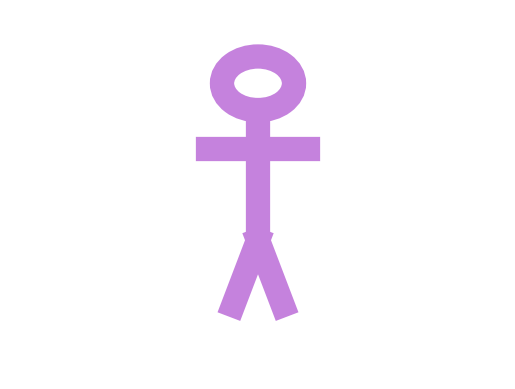

In [613]:
import matplotlib.pyplot as plt
import random

# Funktion zum Erstellen eines Charakters
def create_character():
    character = multivariate_normal_accept_reject(mu, cov, 1)[0]
    return {
        "Größe": character[0],
        "Intelligenz": character[1],
        "Stärke": character[2]
    }

# Funktion zum Zeichnen eines Stickman
def draw_stickman(character):
    # Exponentielle Transformation für deutliche Unterschiede
    size = (character['Größe'] / 280) ** 2  # Normalisieren und skalieren der Größe für die Figurhöhe
    intelligence = (character['Intelligenz'] / 350) ** 2  # Normalisieren und skalieren der Intelligenz für die Kopfgröße
    strength = (character['Stärke'] / 25) ** 2  # Normalisieren und skalieren der Stärke für die Linienstärke

    # Set default values if any of the character attributes are too small
    size = max(size, 0.05)
    intelligence = max(intelligence, 0.05)
    strength = max(strength, 1)

    # Define variables
    head_size = intelligence  # Radius of the head proportional to intelligence
    figure_height = size  # Height of the figure proportional to size
    line_thickness = strength  # Thickness of the lines proportional to strength

    # Generate a random color for the stickman
    color = (random.random(), random.random(), random.random())

    # Create a figure and axis
    fig, ax = plt.subplots()

    # Draw head
    head = plt.Circle((0.5, 0.8), head_size, edgecolor=color, facecolor='none', linewidth=line_thickness)
    ax.add_patch(head)

    # Draw body
    body_start = 0.8 - head_size
    body_end = body_start - figure_height
    ax.plot([0.5, 0.5], [body_start, body_end], color=color, linewidth=line_thickness)

    # Draw arms
    arm_height = body_start - figure_height * 0.3
    ax.plot([0.4, 0.6], [arm_height, arm_height], color=color, linewidth=line_thickness)

    # Draw legs
    leg_start = body_end
    leg_end = leg_start - figure_height * 0.5
    ax.plot([0.5, 0.45], [leg_start, leg_end], color=color, linewidth=line_thickness)
    ax.plot([0.5, 0.55], [leg_start, leg_end], color=color, linewidth=line_thickness)

    # Set limits and hide axes
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')

    # Display the stick figure
    plt.show()

# Erstellen und Anzeigen eines zufälligen Charakters
new_character = create_character()
print("Erstellter Charakter:")
print(f"Größe: {new_character['Größe']:.2f}")
print(f"Intelligenz: {new_character['Intelligenz']:.2f}")
print(f"Stärke: {new_character['Stärke']:.2f}")

# Zeichnen des erstellten Charakters
draw_stickman(new_character)